In [1]:
import pandas as pd
import numpy as np
import pickle
import seaborn as sns
import matplotlib.pyplot as plt
from scalecast.Forecaster import Forecaster

pd.options.display.float_format = '{:.2f}'.format
pd.options.display.max_rows = 1000

In [2]:
data = pd.read_csv('sales-data.csv',parse_dates=['barr_date'])
data = data[(data.region_name=="Global") & (data.business_area_name=="Consolidated")]
data.rename(columns={"barr_date":"date","revenue": "sales"}, inplace=True)
display(data.head())

data = data[['date','sales']]
data.reset_index(drop=True, inplace=True)
data.head()

,business_area_name,region_name,date,sales
0,Consolidated,Global,2013-01-01,15831000.00
1,Consolidated,Global,2013-02-01,20037000.00
2,Consolidated,Global,2013-03-01,20887000.00
3,Consolidated,Global,2013-04-01,18493000.00
4,Consolidated,Global,2013-05-01,17328000.00


,date,sales
0,2013-01-01,15831000.00
1,2013-02-01,20037000.00
2,2013-03-01,20887000.00
3,2013-04-01,18493000.00
4,2013-05-01,17328000.00


In [3]:
data.shape

(108, 2)

<AxesSubplot:xlabel='Date', ylabel='Values'>

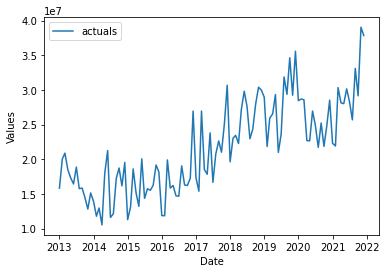

In [4]:
f = Forecaster(y=data['sales'],current_dates=data['date'])
f.plot()

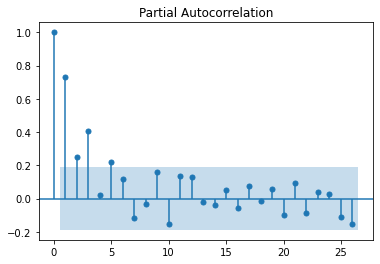

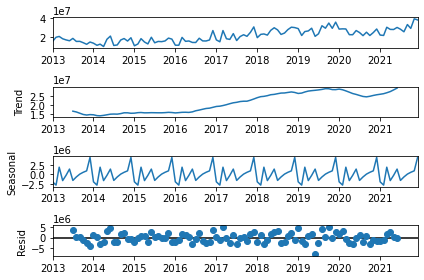

In [5]:
f.plot_pacf(lags=26)
plt.show()

f.seasonal_decompose().plot()
plt.show()

In [6]:
f.set_test_length(12)
f.generate_future_dates(12)
f.set_estimator('lstm')

Epoch 1/200
3/3 [==============================] - 38s 4s/step - loss: 0.5423 - val_loss: 0.1660
Epoch 2/200
3/3 [==============================] - 1s 226ms/step - loss: 0.4195 - val_loss: 0.3398
Epoch 3/200
3/3 [==============================] - 1s 228ms/step - loss: 0.2641 - val_loss: 0.3079
Epoch 4/200
3/3 [==============================] - 1s 233ms/step - loss: 0.2056 - val_loss: 0.2132
Epoch 5/200
3/3 [==============================] - 1s 235ms/step - loss: 0.2041 - val_loss: 0.3797
Epoch 6/200
3/3 [==============================] - 1s 226ms/step - loss: 0.1947 - val_loss: 0.3719
Epoch 7/200
3/3 [==============================] - 1s 228ms/step - loss: 0.1727 - val_loss: 0.3000
Epoch 8/200
3/3 [==============================] - 1s 230ms/step - loss: 0.1777 - val_loss: 0.2936
Epoch 9/200
3/3 [==============================] - 1s 231ms/step - loss: 0.1781 - val_loss: 0.3445
Epoch 10/200
3/3 [==============================] - 1s 239ms/step - loss: 0.1770 - val_loss: 0.3751
Epoch 11/20

3/3 [==============================] - 1s 217ms/step - loss: 0.1190 - val_loss: 0.1640
Epoch 84/200
3/3 [==============================] - 1s 215ms/step - loss: 0.1177 - val_loss: 0.1433
Epoch 85/200
3/3 [==============================] - 1s 218ms/step - loss: 0.1198 - val_loss: 0.1583
Epoch 86/200
3/3 [==============================] - 1s 218ms/step - loss: 0.1176 - val_loss: 0.1656
Epoch 87/200
3/3 [==============================] - 1s 220ms/step - loss: 0.1169 - val_loss: 0.1424
Epoch 88/200
3/3 [==============================] - 1s 220ms/step - loss: 0.1178 - val_loss: 0.1499
Epoch 89/200
3/3 [==============================] - 1s 225ms/step - loss: 0.1163 - val_loss: 0.1621
Epoch 90/200
3/3 [==============================] - 1s 246ms/step - loss: 0.1164 - val_loss: 0.1414
Epoch 91/200
3/3 [==============================] - 1s 221ms/step - loss: 0.1171 - val_loss: 0.1537
Epoch 92/200
3/3 [==============================] - 1s 212ms/step - loss: 0.1173 - val_loss: 0.1409
Epoch 93/200


3/3 [==============================] - 1s 241ms/step - loss: 0.1101 - val_loss: 0.1720
Epoch 165/200
3/3 [==============================] - 1s 231ms/step - loss: 0.1082 - val_loss: 0.1741
Epoch 166/200
3/3 [==============================] - 1s 232ms/step - loss: 0.1106 - val_loss: 0.1807
Epoch 167/200
3/3 [==============================] - 1s 228ms/step - loss: 0.1161 - val_loss: 0.1493
Epoch 168/200
3/3 [==============================] - 1s 256ms/step - loss: 0.1133 - val_loss: 0.1711
Epoch 169/200
3/3 [==============================] - 1s 265ms/step - loss: 0.1148 - val_loss: 0.1499
Epoch 170/200
3/3 [==============================] - 1s 225ms/step - loss: 0.1133 - val_loss: 0.1470
Epoch 171/200
3/3 [==============================] - 1s 235ms/step - loss: 0.1130 - val_loss: 0.1594
Epoch 172/200
3/3 [==============================] - 1s 238ms/step - loss: 0.1154 - val_loss: 0.1653
Epoch 173/200
3/3 [==============================] - 1s 232ms/step - loss: 0.1125 - val_loss: 0.1585
Epoc

Epoch 46/200
4/4 [==============================] - 1s 238ms/step - loss: 0.1280 - val_loss: 0.2431
Epoch 47/200
4/4 [==============================] - 1s 207ms/step - loss: 0.1351 - val_loss: 0.2810
Epoch 48/200
4/4 [==============================] - 1s 221ms/step - loss: 0.1311 - val_loss: 0.3091
Epoch 49/200
4/4 [==============================] - 1s 239ms/step - loss: 0.1298 - val_loss: 0.2726
Epoch 50/200
4/4 [==============================] - 1s 236ms/step - loss: 0.1299 - val_loss: 0.2619
Epoch 51/200
4/4 [==============================] - 1s 233ms/step - loss: 0.1283 - val_loss: 0.2632
Epoch 52/200
4/4 [==============================] - 1s 236ms/step - loss: 0.1245 - val_loss: 0.2474
Epoch 53/200
4/4 [==============================] - 1s 237ms/step - loss: 0.1216 - val_loss: 0.2232
Epoch 54/200
4/4 [==============================] - 1s 235ms/step - loss: 0.1166 - val_loss: 0.2425
Epoch 55/200
4/4 [==============================] - 1s 234ms/step - loss: 0.1162 - val_loss: 0.1949


4/4 [==============================] - 1s 259ms/step - loss: 0.1072 - val_loss: 0.1948
Epoch 128/200
4/4 [==============================] - 1s 259ms/step - loss: 0.1075 - val_loss: 0.1393
Epoch 129/200
4/4 [==============================] - 1s 257ms/step - loss: 0.1068 - val_loss: 0.2290
Epoch 130/200
4/4 [==============================] - 1s 254ms/step - loss: 0.1067 - val_loss: 0.2133
Epoch 131/200
4/4 [==============================] - 1s 257ms/step - loss: 0.1061 - val_loss: 0.1749
Epoch 132/200
4/4 [==============================] - 1s 257ms/step - loss: 0.1056 - val_loss: 0.2407
Epoch 133/200
4/4 [==============================] - 1s 255ms/step - loss: 0.1048 - val_loss: 0.2790
Epoch 134/200
4/4 [==============================] - 1s 261ms/step - loss: 0.1057 - val_loss: 0.1276
Epoch 135/200
4/4 [==============================] - 1s 262ms/step - loss: 0.1075 - val_loss: 0.1108
Epoch 136/200
4/4 [==============================] - 1s 260ms/step - loss: 0.1066 - val_loss: 0.1235
Epoc

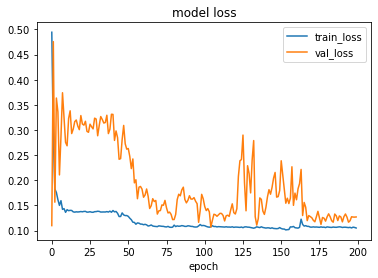

In [7]:
f.manual_forecast(call_me='lstm',
                  lags=24,
                  batch_size=16,
                  epochs=200,
                  validation_split=.20,
                  shuffle=True,
                  activation='tanh',
                  optimizer='Adam',
                  learning_rate=0.001,
                  lstm_layer_sizes=(100,)*15,
                  dropout=(0,)*15,
                  plot_loss=True)

<AxesSubplot:xlabel='Date', ylabel='Values'>

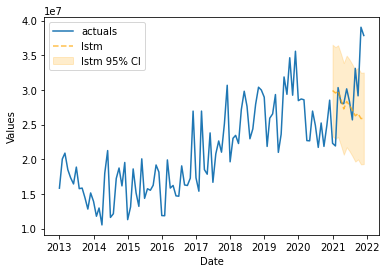

In [8]:
f.plot_test_set(ci=True)

<AxesSubplot:xlabel='Date', ylabel='Values'>

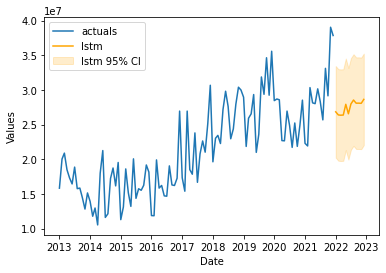

In [9]:
f.generate_future_dates(12)
f.add_time_trend()
f.export(to_excel=True,excel_name='results.xlsx')
f.plot(ci=True)

In [10]:
f.export('model_summaries',determine_best_by='LevelTestSetMAPE')[
    ['ModelNickname',
     'LevelTestSetMAPE',
     'LevelTestSetRMSE',
     'LevelTestSetR2',
     'best_model']
]

,ModelNickname,LevelTestSetMAPE,LevelTestSetRMSE,LevelTestSetR2,best_model
0,lstm,0.15,6406029.52,-0.62,True


In [11]:
test_2021 = f.export_test_set_preds_with_cis('lstm')
display(test_2021.head(12))

predicted_2022 = f.export_forecasts_with_cis('lstm')
display(predicted_2022.head(12))

,DATE,UpperPreds,Preds,Actuals,LowerPreds,ModelNickname,CILevel
0,2021-01-01,36521868.11,29916980.56,22299479.14,23312093.02,lstm,0.95
1,2021-02-01,36163681.85,29558794.30,21921703.91,22953906.76,lstm,0.95
2,2021-03-01,36440227.47,29835339.93,30337446.81,23230452.39,lstm,0.95
3,2021-04-01,35206612.48,28601724.93,28138839.15,21996837.39,lstm,0.95
4,2021-05-01,33868732.64,27263845.09,28020098.96,20658957.55,lstm,0.95
5,2021-06-01,34945968.29,28341080.74,30155245.74,21736193.20,lstm,0.95
6,2021-07-01,34392935.26,27788047.71,28325302.09,21183160.17,lstm,0.95
7,2021-08-01,33670759.62,27065872.08,25682407.30,20460984.54,lstm,0.95
8,2021-09-01,32876456.45,26271568.91,33113061.09,19666681.36,lstm,0.95
9,2021-10-01,33184263.02,26579375.48,29149629.79,19974487.93,lstm,0.95


,DATE,UpperForecast,Forecast,LowerForecast,ModelNickname,CILevel
0,2022-01-01,33447816.72,26842929.17,20238041.63,lstm,0.95
1,2022-02-01,33000225.31,26395337.77,19790450.23,lstm,0.95
2,2022-03-01,32960861.75,26355974.21,19751086.67,lstm,0.95
3,2022-04-01,32983155.42,26378267.88,19773380.33,lstm,0.95
4,2022-05-01,34532641.01,27927753.46,21322865.92,lstm,0.95
5,2022-06-01,33163374.05,26558486.50,19953598.96,lstm,0.95
6,2022-07-01,34582181.93,27977294.38,21372406.84,lstm,0.95
7,2022-08-01,35149082.44,28544194.89,21939307.35,lstm,0.95
8,2022-09-01,34695164.38,28090276.84,21485389.29,lstm,0.95
9,2022-10-01,34700022.80,28095135.26,21490247.71,lstm,0.95


In [12]:
Total_2021 = test_2021['Actuals'].sum()
Total_2022 = predicted_2022['Forecast'].sum()

Yoy_growth = (Total_2022 - Total_2021)/ Total_2021 * 100

print(f'Total_2021:{Total_2021}')
print(f'Total_2022:{Total_2022}')
print(f'YOY (growth):{Yoy_growth}')

Total_2021:354035644.185259
Total_2022:329875153.14641273
YOY (growth):-6.824310330234322
